# 07_03: Name Popularity

In [2]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
pd.options.display.max_rows = 6

In [4]:
allyears = pd.read_csv('allyears.csv.gz')

In [5]:
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
...,...,...,...,...
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018
1957045,Zzyzx,M,5,2018


In [6]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [8]:
allyears_indexed.loc[('F','Mary')]

,number
year,
1880,7065
1881,6919
1882,8148
...,...
2016,2508
2017,2402
2018,2327


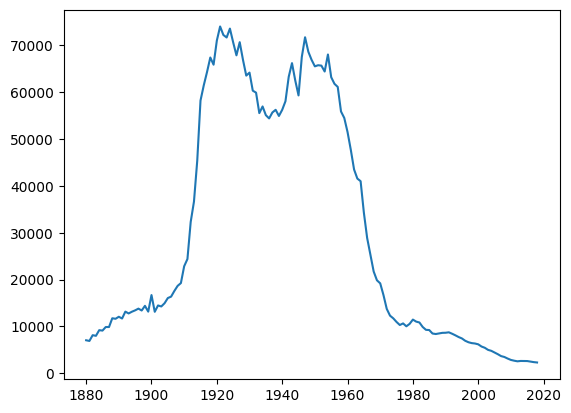

In [9]:
pp.plot(allyears_indexed.loc[('F','Mary')])

/tmp/ipykernel_28774/358167211.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pp.plot(allyears_indexed.loc[('F','Mary')] / allyears.groupby('year').sum())


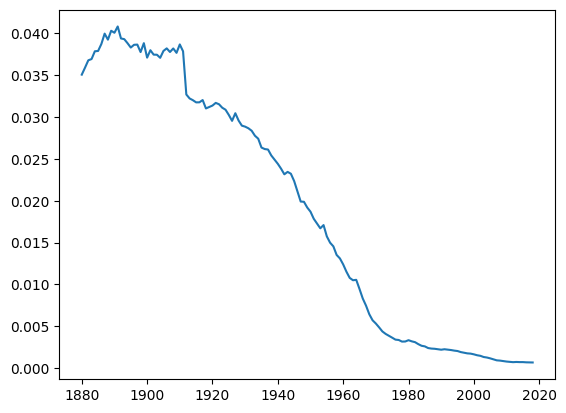

In [10]:
# normalize F/Mary time series by the total number of births each year
pp.plot(allyears_indexed.loc[('F','Mary')] / allyears.groupby('year').sum())

In [11]:
# plot number of sex/name babies as a function of year

def plotname(sex, name):
    data = allyears_indexed.loc[(sex,name)]
    
    pp.plot(data.index, data.values, label=name)
    pp.axis(xmin=1880, xmax=2018)

In [12]:
# combine several "plotname()" plots for given sex and list of names

def comparenames(sex, names):
    pp.figure(figsize=(12,2.5))

    for name in names:
        plotname(sex, name)

    pp.legend()

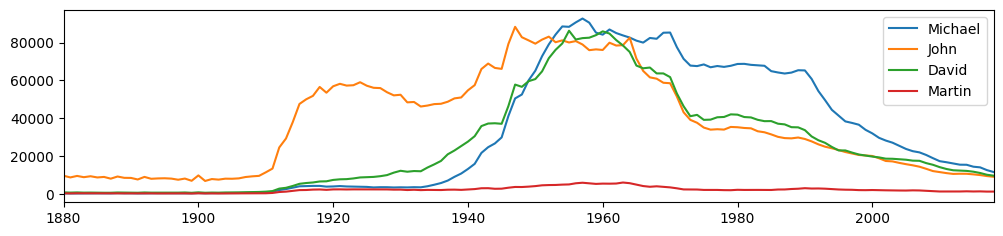

In [13]:
comparenames('M', ['Michael','John','David','Martin'])

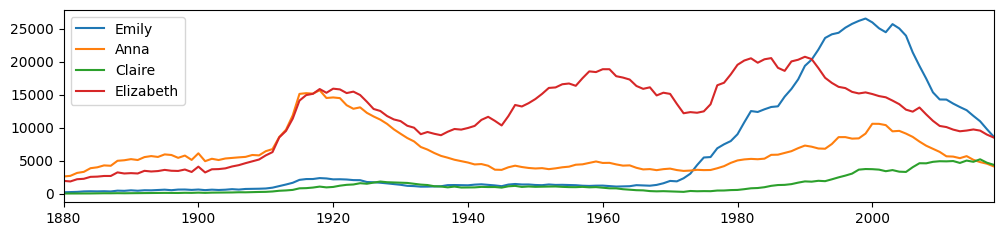

In [14]:
comparenames('F', ['Emily','Anna','Claire','Elizabeth'])

In [15]:
claires = ['Claire','Clare','Clara','Chiara','Ciara']

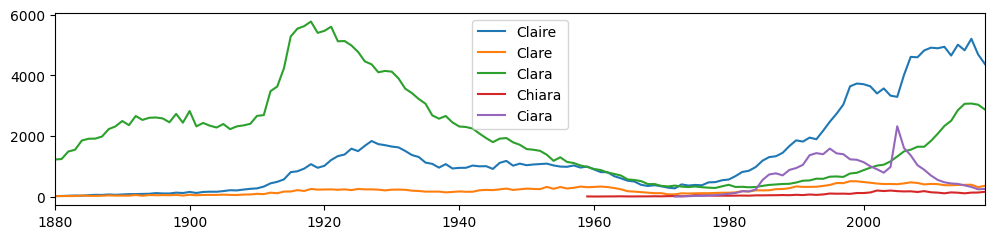

In [16]:
comparenames('F', claires)

In [17]:
# Frequency for all of the claires in a stacked index
allyears_indexed.loc[('F',claires),:]

number
sex name   year        
F   Claire 1880      21
           1881      23
           1882      30
...                 ...
    Ciara  2016     321
           2017     243
           2018     256

[522 rows x 1 columns]

In [18]:
# "pivot" the third level of the multiindex (years) to create a row of columns;
# result is names (rows) x years (columns)
allyears_indexed.loc[('F',claires),:].unstack(level=2)

number                                                          \
year          1880    1881    1882    1883    1884    1885    1886    1887   
sex name                                                                     
F   Claire    21.0    23.0    30.0    38.0    33.0    49.0    61.0    58.0   
    Clare     15.0    20.0    21.0    22.0    38.0    27.0    26.0    31.0   
    Clara   1226.0  1242.0  1490.0  1548.0  1852.0  1910.0  1916.0  1984.0   
    Chiara     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Ciara      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                            ...                                          \
year          1888    1889  ...    2009    2010    2011    2012    2013   
sex name                    ...                                           
F   Claire    73.0    62.0  ...  4824.0  4915.0  4896.0  4944.0  4656.0   
    Clare     43.0    34.0  ...   405.0   421.0   414.0   379.0   377.0   
    Clara   2230.0  2319.0  ...  1647.0  1840.0  2074.0  2333.0  2504.0   
    Chiara     NaN     NaN  ...   183.0   145.0   134.0   111.0   142.0   
    Ciara      NaN     NaN  ...   888.0   699.0   554.0   475.0   436.0   

                                                    
year          2014    2015    2016    2017    2018  
sex name                                            
F   Claire  5014.0  4829.0  5209.0  4693.0  4379.0  
    Clare    386.0   389.0   394.0   315.0   357.0  
    Clara   2854.0  3064.0  3072.0  3035.0  2877.0  
    Chiara   131.0   111.0   134.0   137.0   160.0  
    Ciara    422.0   372.0   321.0   243.0   256.0  

[5 rows x 139 columns]

In [19]:
# "pivot" the third level of the multiindex (names) to create a row of columns
allyears_indexed.loc[('F',claires),:].unstack(level=1)

number                             
name      Claire  Clare   Clara Chiara  Ciara
sex year                                     
F   1880    21.0   15.0  1226.0    NaN    NaN
    1881    23.0   20.0  1242.0    NaN    NaN
    1882    30.0   21.0  1490.0    NaN    NaN
...          ...    ...     ...    ...    ...
    2016  5209.0  394.0  3072.0  134.0  321.0
    2017  4693.0  315.0  3035.0  137.0  243.0
    2018  4379.0  357.0  2877.0  160.0  256.0

[139 rows x 5 columns]

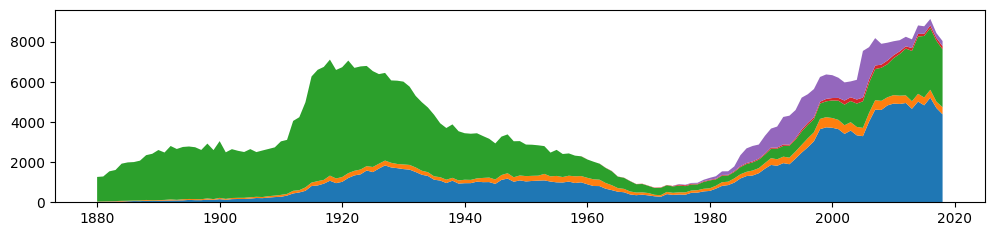

In [20]:
# make a stacked (cumulative) area plot using names x years table 

pp.figure(figsize=(12,2.5))
pp.stackplot(range(1880,2019),
             allyears_indexed.loc[('F',claires),:].unstack(level=2));

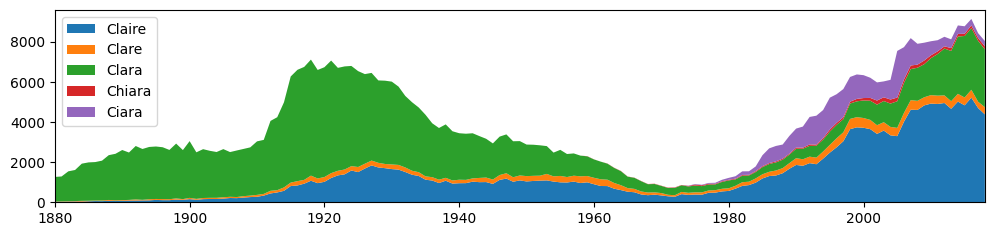

In [21]:
# fix stacked plot by filling NaNs with zeros, adding labels, setting axis range

pp.figure(figsize=(12,2.5))
pp.stackplot(range(1880,2019),
             allyears_indexed.loc[('F',claires),:].unstack(level=2).fillna(0),
             labels=claires);

pp.legend(loc='upper left')
pp.axis(xmin=1880, xmax=2018);